In [1]:
from typing import Dict, List, Optional
import numpy as np
import pandas as pd
from datetime import datetime
from typing import Tuple, Dict, Any
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    balanced_accuracy_score,
    confusion_matrix
)

In [2]:
# y_test
y_test = pd.read_pickle("../data/07_model_output/y_test_for_eval.pkl")
y_test.head(5)

,outcome
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [3]:
y_pred = pd.read_pickle("../data/07_model_output/y_pred_for_eval.pkl")
y_pred.head(5)


0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [4]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print(cm)

[[83 17]
 [26 28]]


In [23]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(
    y_test: pd.Series,
    y_pred: pd.Series,
    run_id: str
) -> plt.Figure:
    """
    Given true labels and predicted labels, draw a confusion-matrix heatmap
    using imshow + text. Returns a Matplotlib Figure (dpi=300), including run_id in the title.
    """
    # 1) Turn off interactive mode and close any old figures
    plt.ioff()
    plt.close("all")

    # 2) Compute the 2×2 confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # 3) Create a high-DPI figure
    fig, ax = plt.subplots(figsize=(4, 3), dpi=300)

    # 4) Display with imshow to get full control (origin='upper' puts [0,0] in top-left)
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues", origin="upper")

    # 5) Annotate each cell with its integer value
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(
            j, i,               # column=j, row=i
            f"{cm[i, j]:d}",    # the number
            ha="center", 
            va="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )

    # 6) Configure ticks and labels
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels([0, 1])
    ax.set_yticklabels([0, 1])
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(f"Confusion Matrix (run ID {run_id})")

    # 7) Ensure all cells are inside the axes
    ax.set_xlim(-0.5, cm.shape[1] - 0.5)
    ax.set_ylim(cm.shape[0] - 0.5, -0.5)

    # 8) Tight layout (with a bit more bottom padding for labels)
    fig.subplots_adjust(bottom=0.2)
    fig.tight_layout()

    # 9) Restore interactive mode
    plt.ion()
    return fig


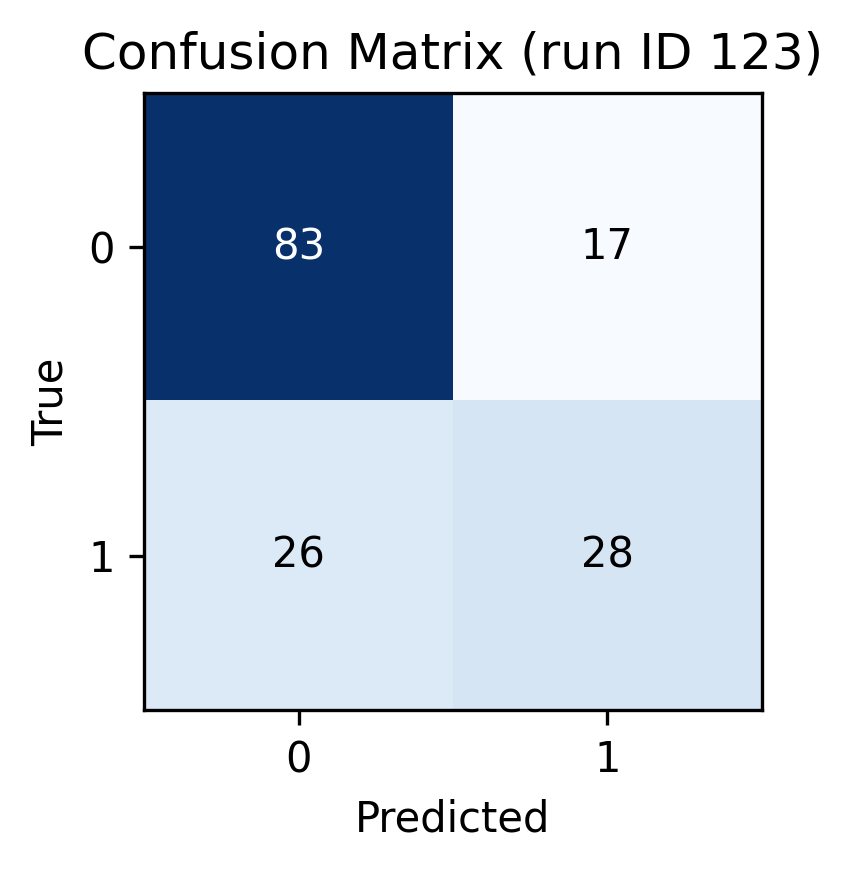

In [24]:
plot_confusion_matrix(y_test, y_pred, run_id="123")

In [ ]:
# src/pimapy/pipelines/logistic_regression/pipeline.py - pipeline node:
(
    func=plot_confusion_matrix,
    inputs=[
        "y_test_for_eval",
        "y_pred_for_eval",
        "run_id"
    ],
    outputs="lr_cm_fig",   # Matplotlib Figure
    name="plot_lr_confusion_matrix_node",
),

In [ ]:
tuned_rf_model = catalog.load("tuned_rf_model")
X_train = catalog.load("X_train")

In [ ]:
 def plot_rf_feature_importance(
    rf_pipeline: Pipeline,
    X_train: pd.DataFrame
) -> plt.Figure:
    """
    Given a trained RandomForest pipeline (with step "clf") and the original
    training DataFrame, extract feature importances and plot them in descending order.

    Inputs:
      - rf_pipeline: a fitted Pipeline whose final step is a RandomForestClassifier
      - X_train:     the DataFrame used to train (so we know column names)

    Returns:
      - fig: a Matplotlib Figure containing a horizontal barplot of importances
    """
    # 1) Extract raw importances array from the fitted RF
    rf_model = rf_pipeline.named_steps["clf"]
    importances = rf_model.feature_importances_
    
    # 2) Build a DataFrame mapping feature → importance
    feature_names = list(X_train.columns)
    df_imp = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    
    # 3) Sort in descending order
    df_imp = df_imp.sort_values(by="importance", ascending=False).reset_index(drop=True)
    
    # 4) Create a figure that's tall enough to accommodate all features
    height = max(2, 0.3 * len(feature_names))
    fig, ax = plt.subplots(figsize=(6, height), dpi=300)
    plt.close(fig)
    # 5) Draw a horizontal barplot
    sns.barplot(
        x="importance",
        y="feature",
        data=df_imp,
        ax=ax,
        palette="viridis"
    )
    ax.set_title("Random Forest Feature Importances", pad=10)
    ax.set_xlabel("Importance (mean decrease in impurity)")
    ax.set_ylabel("")
    
    fig.tight_layout()
    return fig

In [ ]:
plot_rf_feature_importance(tuned_rf_model, X_train)